# Comparasion between the results of filtering in the frequency domain and the spatial domain

## Abstract
This lab aims to compare the results of filtering in the frequency domain and the spatial domain. And it is expected to obtian the same results when operating in these two domain.

## Introduction
In this lab, we have an image of a building (building.tif), apply the Sobel mask in Figure 4.38(a) in the frequency domain and the spatial domain respectively. Then we check whether the results are the same.

## Material
We first download the building image from the website, whose size is 338 * 338. Then make it as a grayscale image. To make it simple, I do not resize it to 600 * 600. 

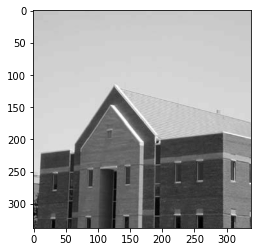

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img0 = cv2.imread('Resource/building.jpg', )

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

We are now ready to apply sobel mask to the image in the spatial domain. We apply convolution to the image manually instead of using the Sobel() function in opencv library, so we need to traverse the image array.

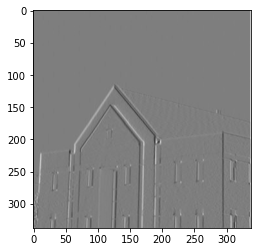

In [3]:
# convolution sobel kernel
sobelKernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
spatialResult = np.zeros([338, 338])
grayPadded = np.pad(gray, pad_width=1, mode='constant')
for x in range(338):
    for y in range(338):
        add = sobelKernel[0][0] * grayPadded[x][y] + sobelKernel[0][1] * grayPadded[x][y + 1] + sobelKernel[0][2] * \
              grayPadded[x][y + 2] + sobelKernel[1][0] * grayPadded[x + 1][y] + sobelKernel[1][1] * grayPadded[x + 1][
                  y + 1] + sobelKernel[1][2] * grayPadded[x + 1][y + 2] + sobelKernel[2][0] * grayPadded[x + 2][y + 0] + \
              sobelKernel[2][1] * grayPadded[x + 2][y + 1] + sobelKernel[2][2] * grayPadded[x + 2][y + 2]
        spatialResult[x][y] = add
plt.imshow(spatialResult, cmap='gray')

Then we apply sobel mask to the image in the frequency domain.  First we need to pad both source image and kernel to the size of 340 * 340 (338+3-1). Then we follow the instructions below.

(1) Multiply hp(x,y) and fp(x,y) by (−1)^(x+y) to center the frequency domain filter; 

(2) Compute the forward DFT of the result in (1) to generate H(u,v); 

(3) Set the real part of H(u,v) to 0 to account for parasitic real parts (we know that H has to be purely imaginary
because hp is real and odd);

(4) Multiply the result by (−1)^(u+v). This last step reverses the multiplication of H(u,v) by (−1)^(u+v) , which is implicit when h(x, y) was manually placed in the center of hp(x,y).

(5)Multiply the two frequency function to get the result in frequency domain. G(u,v) = H(u,v) * F(u,v)

(6)Perform IDFT to get and show the result in spatial domain

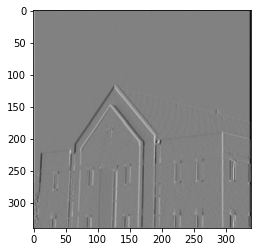

In [4]:
# Padding Images with zeros
padding=[340, 340]
paddedImage = np.zeros(padding, dtype="float32")
paddedImage[:gray.shape[0], :gray.shape[1]] = gray
paddedKernel = np.zeros(padding, dtype="float32")
paddedKernel[:sobelKernel.shape[0], :sobelKernel.shape[1]] = sobelKernel
# DFT
dftImage = cv2.dft(paddedImage)
dftKernel = cv2.dft(paddedKernel)
# Multiplication
mulRes = cv2.mulSpectrums(dftImage, dftKernel, flags=cv2.DFT_COMPLEX_OUTPUT)
# Get Result
frequencyResult = cv2.idft(mulRes, flags=cv2.DFT_SCALE)
plt.imshow(frequencyResult, cmap='gray')

## Result

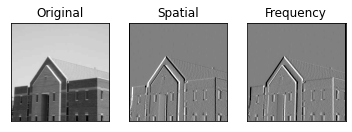

In [7]:
plt.subplot(1, 3, 1), plt.imshow(gray, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(spatialResult, cmap='gray', vmin=-256, vmax=255)
plt.title('Spatial'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(frequencyResult, cmap='gray', vmin=-256, vmax=255)
plt.title('Frequency'), plt.xticks([]), plt.yticks([])


plt.show()

## Discussion
The edges of the original is enhanced as expected in both domians. But there are still differences in these two results.